In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import copy

In [3]:
def getData(path, col, point, flag = 1):

    if flag == 1:
        f = open(path, "r")
        lines = f.readlines()

        a = [[] for i in range (0,col)]

        for line in lines:
            item = line.split(point)
            for i in range (0, col):
                a[i].append(item[i])
                
    elif flag == 2:
        f = open(path, "r")
        lines = f.readlines()

        a = [[[]for j in range (0, col)] for i in range (0,20)]
        
        index = 0

        for line in lines:
            if line.find('a') != -1:
                index += 1
                continue;
            else:
                item = line.split(point)
                for i in range (0, col):
                    a[index][i].append(item[i])
                    
    elif flag == 3:
        f = open(path, "r")
        lines = f.readlines()
        
        a = [[], []]
        
        for line in lines:
            if line.find('a') != -1:
                item = line.replace("a", "")
                a[0].append(item)
            else:
                a[1].append(line)
        
    return a
    

In [6]:
filePath = "C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/"

sphere = getData(filePath + "sphere.txt", 2, "\t") # 200 lines
cube = getData(filePath + "cube.txt", 2, "\t") # 200 lines
hippo = getData(filePath + "hippo.txt", 2, "\t") # 200 lines
torus = getData(filePath + "torus.txt", 2, "\t") # 200 lines
cloth = getData(filePath + "cloth.txt", 2, "\t") # 200 lines

sphere[0] = list(map(int, sphere[0]))
sphere[1] = list(map(int, sphere[1]))

cube[0] = list(map(int, cube[0]))
cube[1] = list(map(int, cube[1]))

hippo[0] = list(map(int, hippo[0]))
hippo[1] = list(map(int, hippo[1]))

torus[0] = list(map(int, torus[0]))
torus[1] = list(map(int, torus[1]))

cloth[0] = list(map(int, cloth[0]))
cloth[1] = list(map(int, cloth[1]))

sumData = [sum(sphere[0]), sum(sphere[1]),
           sum(cube[0]), sum(cube[1]),
           sum(hippo[0]), sum(hippo[1]),
           sum(torus[0]), sum(torus[1]),
           sum(cloth[0]), sum(cloth[1])]


for i in range(0, 10):
    sumData[i] = sumData[i] / 1000000
    
dummyDataForOurs = copy.deepcopy(sumData)
dummyDataForFEPR = copy.deepcopy(sumData)

overHeadOurs = []
overHeadFEPR = []


for i in range(5):
    overHeadOurs.append(rand.randrange(10, 30))
    overHeadFEPR.append(rand.randrange(50, 100))

## Overhead 는 getData에서 구현

testData = getData(filePath + "test.txt", 2, "\t", 2)

testData[0] = list(map(float, testData[0]))
testData[1] = list(map(int, testData[1]))
    
    
dataRatio = [sumData[0]/sumData[1],
             sumData[2]/sumData[3],
             sumData[3]/sumData[4],
             sumData[5]/sumData[6],
             sumData[7]/sumData[8]]

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/sphere.txt'

In [1]:
x = np.arange(0, 20)

overHeadFEPR[1] = sum(testData[1])/1000000 #temporary code

example = ['sphere', 'cube', 'hippo', 'torus', 'cloth']
method = ['PD', 'Ours', 'FEPR']

name = []

for word in example:
    for j in range(4):
        if j == 3:
            name.append('')
        else:
            name.append(word + method[j])

            
pitColor = ['tomato', 'cornflowerblue', 'lightgreen', 'violet']            
        
for w in range(3):
    if w == 0: # PD
        for i in range(5):
            if i == 0:
                plt.bar(i * 4, sumData[i * 2], width = 0.25, color = pitColor[0], label = 'Global solve')
            else:
                plt.bar(i * 4, sumData[i * 2], width = 0.25, color = pitColor[0])
        for i in range(1,6):
            if i == 1:
                plt.bar((i - 1) * 4, sumData[i * 2 - 1], width = 0.25, color = pitColor[1], bottom = sumData[(i - 1) * 2], label = 'Local solve')
            else:
                plt.bar((i - 1) * 4, sumData[i * 2 - 1], width = 0.25, bottom = sumData[(i - 1) * 2], color = pitColor[1])
                
    elif w == 1: # ours
        for i in range(5):
            if i == 0:
                plt.bar(i * 4 + 1, dummyDataForOurs[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 1, overHeadOurs[i], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2], color = pitColor[2], label = 'Ours Overhead') #ours overhead
            else:
                plt.bar(i * 4 + 1, dummyDataForOurs[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 1, overHeadOurs[i], width = 0.25, bottom = dummyDataForOurs[i * 2 + 1] + dummyDataForOurs[i * 2], color = pitColor[2]) #ours overhead
        for i in range(1,6): 
            plt.bar((i - 1) * 4 + 1, dummyDataForOurs[i * 2 - 1], width = 0.25, bottom = dummyDataForOurs[(i - 1) * 2], color = pitColor[1])
            
    elif w == 2: # FEPR
        for i in range(5):
            if i == 0:
                plt.bar(i * 4 + 2, dummyDataForFEPR[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 2, overHeadFEPR[i], width = 0.25, bottom = dummyDataForFEPR[i * 2 + 1] + dummyDataForFEPR[i * 2], color = pitColor[3], label = 'FEPR Overhead') #FEPR overhead
            else:
                plt.bar(i * 4 + 2, dummyDataForFEPR[i * 2], width = 0.25, color = pitColor[0])
                plt.bar(i * 4 + 2, overHeadFEPR[i], width = 0.25, bottom = dummyDataForFEPR[i * 2 + 1] + dummyDataForFEPR[i * 2], color = pitColor[3]) #FEPR overhead
        for i in range(1,6):
            plt.bar((i - 1) * 4 + 2, dummyDataForFEPR[i * 2 - 1], width = 0.25, bottom = dummyDataForFEPR[(i - 1) * 2], color = pitColor[1])

csfont = {'fontname':'times new roman'}
    
plt.xticks(x, name, **csfont)
plt.ylabel('Overhead(ms)', **csfont)
plt.legend(loc='upper right')
plt.axis([-1, 20, 0, 1000])

plt.rcParams["figure.figsize"] = (16, 16)
plt.savefig('C:/Users/JeongWooSeok/Desktop/test.png', dpi=200)
plt.show()

print("전체비 A/B:" + str(sum(dataRatio)/4))



NameError: name 'np' is not defined

In [136]:
a = "123\n a123\n"

b = a.split("\n")

#print(b)
print(a[a.find('a') + 1])

#a = a.replace(a[a.find('a')],'')
a = a[:a.find('a')] + a[a.find('a')+1:] # a 랑 그 뒤 하나 제거

print(a)


#find는 문자열 없으면 -1 반환

1
123
 123



In [8]:
testData = getData(filePath + "test.txt", 2, "\t", 2)

for i in range(20):
    testData[i][0] = list(map(float, testData[i][0]))
    testData[i][1] = list(map(int, testData[i][1]))
    

#sumTime = sum(testData[1])/1000000


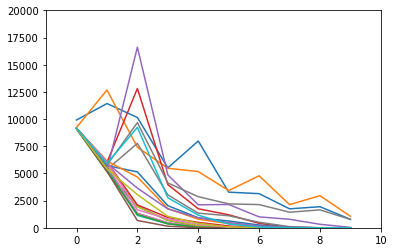

In [15]:
x = np.arange(0, 11)


sumLoss = np.zeros(10)

for i in range(20):
    plt.plot([0,1,2,3,4,5,6,7,8,9], testData[i][0][:10])


    
plt.axis([-1, 10, 0, 20000])    
plt.savefig('C:/Users/JeongWooSeok/Desktop/test2.png', dpi=200)
plt.show()

In [25]:
CPDOverheadData = getData("C:/Users/JeongWooSeok/Documents/Constrained-Projective-Dynamics/GenPD/GenPD/CPDOverhead.txt",1, 0,3)

CPDOverheadData[0] = list(map(int, CPDOverheadData[0]))
CPDOverheadData[1] = list(map(int, CPDOverheadData[1]))

sumCPDOverhead = [[sum(CPDOverheadData[0])], 
                  [sum(CPDOverheadData[1])]]

print(sumCPDOverhead)

[[12746800], [11675700]]
